# Train Variational Autoencoder

### Import Modules

In [1]:
# external modules
import os
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from pytorch_lightning.trainer import Trainer
from pytorch_lightning.callbacks import TQDMProgressBar
# internal modules
from VariationalAE_model import VariationalAutoEncoder
from dataset_VariationalAE import Dataset_1d

### Variables for Net Structure and Data Generation

In [2]:
# net parameters
latent_dimension = 2
variable_space = 20
steps = 5

# model params
size = 1000
generations = 10000
batch_size = 64

## 1) Generate Training Data

In [3]:
dataset = Dataset_1d(variable_space=variable_space,
                     size=size,
                     generations=generations)
dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

Have a glance at the data.

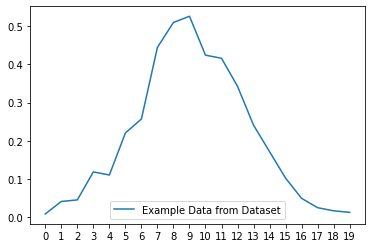

In [4]:
plt.plot(dataset[0], label="Example Data from Dataset")
plt.xticks(torch.arange(0, variable_space))
plt.legend()
plt.show()

## 2) Train Model

########## MODEL ##########
VariationalAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=20, out_features=12, bias=True)
    (1): PReLU(num_parameters=1)
    (2): Linear(in_features=12, out_features=7, bias=True)
    (3): PReLU(num_parameters=1)
    (4): Linear(in_features=7, out_features=5, bias=True)
    (5): PReLU(num_parameters=1)
  )
  (mu_layer): Linear(in_features=5, out_features=2, bias=True)
  (log_var_layer): Linear(in_features=5, out_features=2, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): PReLU(num_parameters=1)
    (2): Linear(in_features=5, out_features=7, bias=True)
    (3): PReLU(num_parameters=1)
    (4): Linear(in_features=7, out_features=12, bias=True)
    (5): PReLU(num_parameters=1)
    (6): Linear(in_features=12, out_features=20, bias=True)
  )
  (mse_criterion): MSELoss()
)
########## MODEL ##########


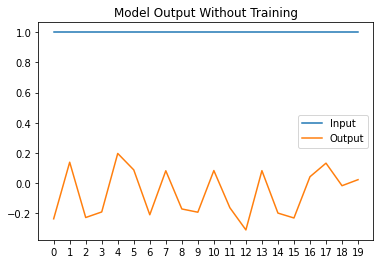

In [5]:
model = VariationalAutoEncoder(latent_dimension=latent_dimension,
                    variable_space=variable_space,
                    steps=steps)

# overview of the model structure
print("########## MODEL ##########")
print(model)
print("########## MODEL ##########")

# before training (ensure that model has correct sizes)
data_no_training = torch.ones(variable_space)
result_not_training = model.forward(data_no_training)

plt.plot(data_no_training.detach().numpy(), label="Input")
plt.plot(result_not_training.detach().numpy(), label="Output")
plt.xticks(torch.arange(0, variable_space))
plt.legend()
plt.title("Model Output Without Training")
plt.show()

In [6]:
callbacks = [TQDMProgressBar(refresh_rate=20)]
trainer = Trainer(max_epochs=1, callbacks=callbacks)
trainer.fit(model,dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:307: LightningDeprecationWarning: The `LightningModule.on_epoch_end` hook was deprecated in v1.6 and will be removed in v1.8. Please use `LightningModule.on_<train/validation/test>_epoch_end` instead.
  rank_zero_deprecation(

  | Name          | Type       | Params
---------------------------------------------
0 | encoder       | Sequential | 386   
1 | mu_layer      | Linear     | 12    
2 | log_var_layer | Linear     | 12    
3 | decoder       | Sequential | 416   
4 | mse_criterion | MSELoss    | 0     
---------------------------------------------
826       Trainable params
0         Non-trainable params
826       Total params
0.003     Total estimated model params size (MB)
/opt/homebrew/lib/python3.9/site-packages/pytorch_lightning/trainer/c

Training: 0it [00:00, ?it/s]

tensor(1.0100, grad_fn=<MaxBackward1>)


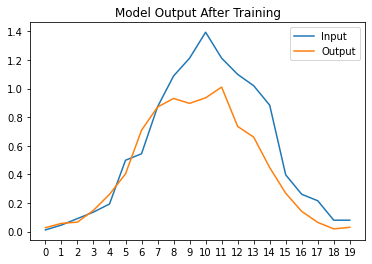

In [14]:
data_after_training = dataset[5]
result_after_training = model.forward(data_after_training)
print(result_after_training.max())

plt.plot(data_after_training.detach().numpy(), label="Input")
plt.plot(result_after_training.detach().numpy(), label="Output")
plt.xticks(torch.arange(0, variable_space))
plt.legend()
plt.title("Model Output After Training")
plt.show()

## 3) Loss of the Model

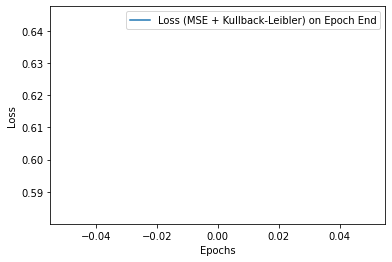

In [8]:
loss_on_epoch_end = model.total_loss

plt.plot(loss_on_epoch_end, label="Loss (MSE + Kullback-Leibler) on Epoch End")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 4) Latent Space

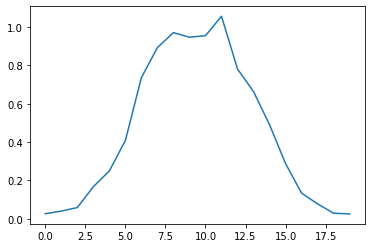

In [11]:
latent_space = model.variational_encoding(data_after_training).detach().numpy()
latent_space

plt.plot(model.decoder(torch.tensor([0.0, 0.0])).detach().numpy())


## 5) Save the Model 

In [10]:
# path to save parameters from training
PATH = "../trained_models/VariationalAE_NN.pth"
if not os.path.exists(os.path.dirname(PATH)):
    os.mkdir(os.path.dirname(PATH))

torch.save(model.state_dict(), PATH)
print(f"Saved the model dictionary under {PATH}. Exiting.")

Saved the model dictionary under ../trained_models/VariationalAE_NN.pth. Exiting.
